# Summary notebook of the current progress
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
1. <span style="color:yellow">Generate one correlation matrix from complete time series data of one subject using phase randomisation.
2. <span style="color:yellow">Generate n correlation matrices from a slices time series to explore time dynamics
3. <span style="color:green">From the correlation matrix, compute the Euler characteristic, Euler entropy, Shannon entropy and clique complex
4. <span style="color:yellow">Following up on Fernando's paper 'topological phase transitions in functional brain networks', try to find similar phase transitions in this data.
5. <span style="color:green">From the clique complex, generate the inverse connectivity matrix $L^{-1}$ as required by Knill's calculation
6. <span style="color:green">From $L^{-1}$, compute the free energy for that specific datasubset, i.e. subject/timeseries slice/brain region etc..
7. <span style="color:yellow">Order the data according to age, or some other variable like time, sex, pathology, threshold etc., to explore topological biomarkers.

**Run before using the notebook**

In [96]:
# Import necessary libraries
import numpy as np
import networkx as nx

# Import external background functions
%run functionals.py
%run TDA_Danillo_Windows.py

#### 1. <span style="color:yellow">Generate one correlation matrix from complete time series data of one subject using phase randomisation.

In [ ]:
/

#### 2. <span style="color:yellow">Generate n correlation matrices from a slices time series to explore time dynamics

In [ ]:
/

#### 3. Compute $\chi$, $S_{Shannon}$ and clique complex
From the correlation matrix, compute the Euler characteristic, Euler entropy, Shannon entropy and clique complex

In [63]:
# Import correlation data as matrix
M = file_to_matrix('1000_Functional_Connectomes/Connectivity matrices/Baltimore_5561_connectivity_matrix_file.txt')

In [51]:
# Define desired settings
cutoff=0.1 # Later to be improved by using phase randomisation
max_dim=1

The clique complex, Euler Characteristic and Shannon entropy below are all computed individually. That is, they should be integrated into one function if they are all desired simultaneously, since now the computation happens three times.

In [ ]:
# Generate clique complex
%time clique_complex = list(cliques_gudhi_matrix_comb(M,cutoff,max_dim))

In [ ]:
# Compute the Euler Characteristic
%time euler_characteristic = compute_euler(M,cutoff,max_dim)
# The Euler entropy is just the natural log of the Euler characteristic

In [ ]:
# Compute the Shannon Entropy
%time shannon_entropy = compute_shannon_entropy(M,cutoff,max_dim)

#### 4. Explore topological phase transition of $\chi$ for varying $\epsilon$
Following up on Fernando's paper 'topological phase transitions in functional brain networks', try to find similar phase transitions in this data.

#### 5. Generate inverse connectivity matrix $L^{-1}$

From the clique complex, generate the inverse connectivity matrix $L^{-1}$ as required by Knill's calculation.

First convert the clique complex to make it compatible with the consecutive code. Then generate $L$ from the clique complex. Lastly, invert this matrix to obtain the desired $L^{-1}$ inverse connectivity matrix.

In [58]:
# Generate the connectivity matrix L from the clique complex
inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)

#### 6. Minimise the Internal Energy and maximise entropy
Minimise energy by adjusting the probability distribution using Simulated Annealing. First test if Simulated Annealing actually converges towards minimum energy and maximum entropy for a small matrix. Then test if this optimisation is feasible for realistic matrix size. 

In [71]:
# Give a test matrix
test_matrix = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])

In [74]:
# Generate max entropies and min energies using Simulated Annealing
%time entropies, average_entropy, energies, average_energy = simulated_annealing(test_matrix, num_runs=100, num_iterations_energy=10000, num_iterations_entropy=1000)

C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\functionals.py:34: RuntimeWarning: overflow encountered in exp
  current_probabilities = new_probabilities


CPU times: total: 6.7 s
Wall time: 21.6 s


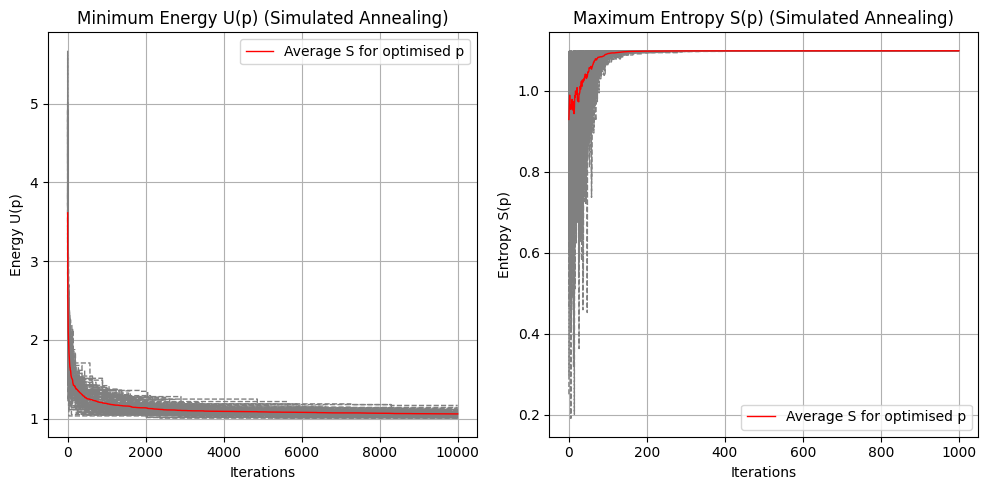

In [75]:
# Plot the results
plot_SA_data(entropies, average_entropy, energies, average_energy)

From the plots above it is shown that the minimum energy and maximum entropy are optimised using the simulated annealing technique. From this, we assume that we can use the simulated annealing method from here on. Now try this method for a large dataset of a size close to the real data.

In [98]:
# Generate a larger test matrix of realistic size for one run
test_matrix = generate_symmetric_binary_matrix(1000)

In [102]:
# Generate max entropies and min energies using Simulated Annealing
%time entropies, average_entropy, energies, average_energy = simulated_annealing(test_matrix, num_runs=1, num_iterations_energy=1000, num_iterations_entropy=1000)

CPU times: total: 7.38 s
Wall time: 9.1 s


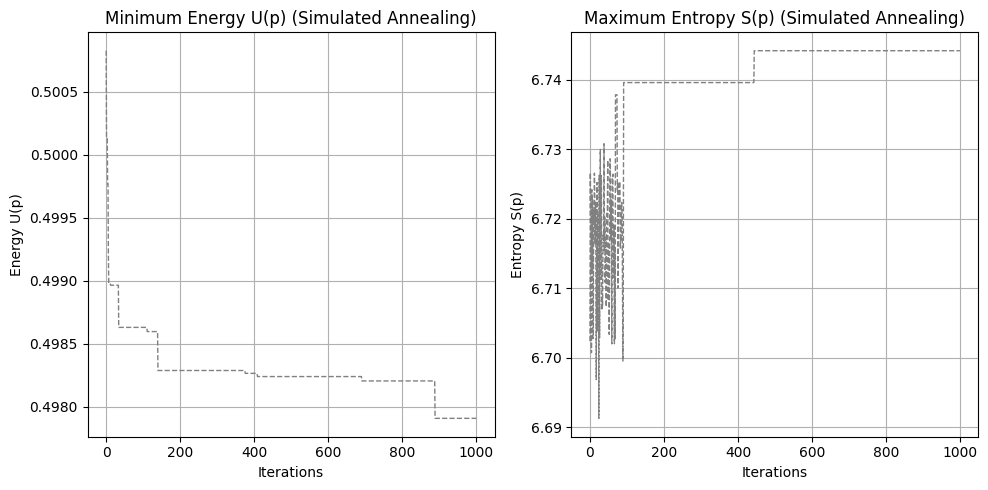

In [103]:
# Plot the results
plot_SA_data(entropies, None, energies, None)

#### 7. Compute Free Energy 

From $L^{-1}$, compute the Helmholtz free energy for the specific datasubset, i.e. subject/timeseries slice/brain region etc. The maximum entropy S(p) and minimum internal unergy U(p) need to be found to compute the Helmholtz free energy F(p), like:

$F(p) = U(p) - \Beta S(p)$

Where $\Beta = \frac{1}{k_B T}$ represents the temperature influence, which is set to be constant of value 1. The value of this constant is irrelevant because we are only interested in energy differences and not absolute energies themselfs. The minimum energy is acquired by using Simulated Annealing to find the probability distribution for which U(p) is minimised. The maximum entropy is assumed to be required when the probability distribution is uniform. However, the code allows for Simulated Annealing to apply on the Entropy as well if necessary.

In [70]:
# Compute the Helmholtz free energy
%time energy = free_energy(inverse_connectivity_matrix, 1)

CPU times: total: 13.6 s
Wall time: 51.9 s
